# TASK-2: Prediction using Unsupervised ML

### AUTHOR: Subham Surana

### PROBLEM STATEMENT: Predict the optimum number of clusters and represent it visually

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Reading the Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dropping the 'Id' column as it is not important for finding the optimum number of clusters
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

In [4]:
# To check number of rows and columns in our dataset
df.shape 

(150, 5)

In [5]:
# To check if there is any null value in any column
df.isnull().sum()  

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


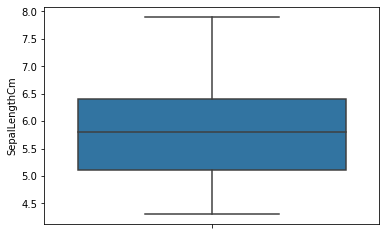

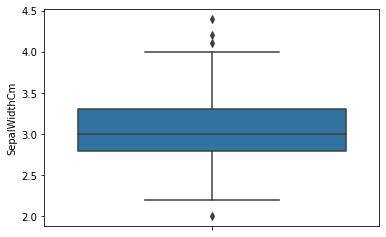

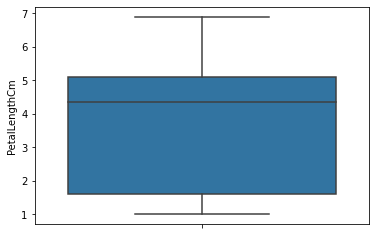

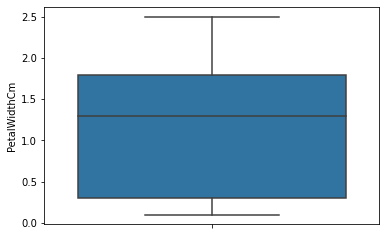

In [7]:
# To check for outliers
cols = df.columns
for i in cols[:-1]:
    sns.boxplot(y=df[i])
    plt.show()

> From the above boxplot we can see that there are outliers in the column 'SepalWidthCm'

In [8]:
# To remove outliers from 'SepalWidthCm'
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

> We can see that after outlier treatment the number of rows are reduced to 146 from 150

In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualization

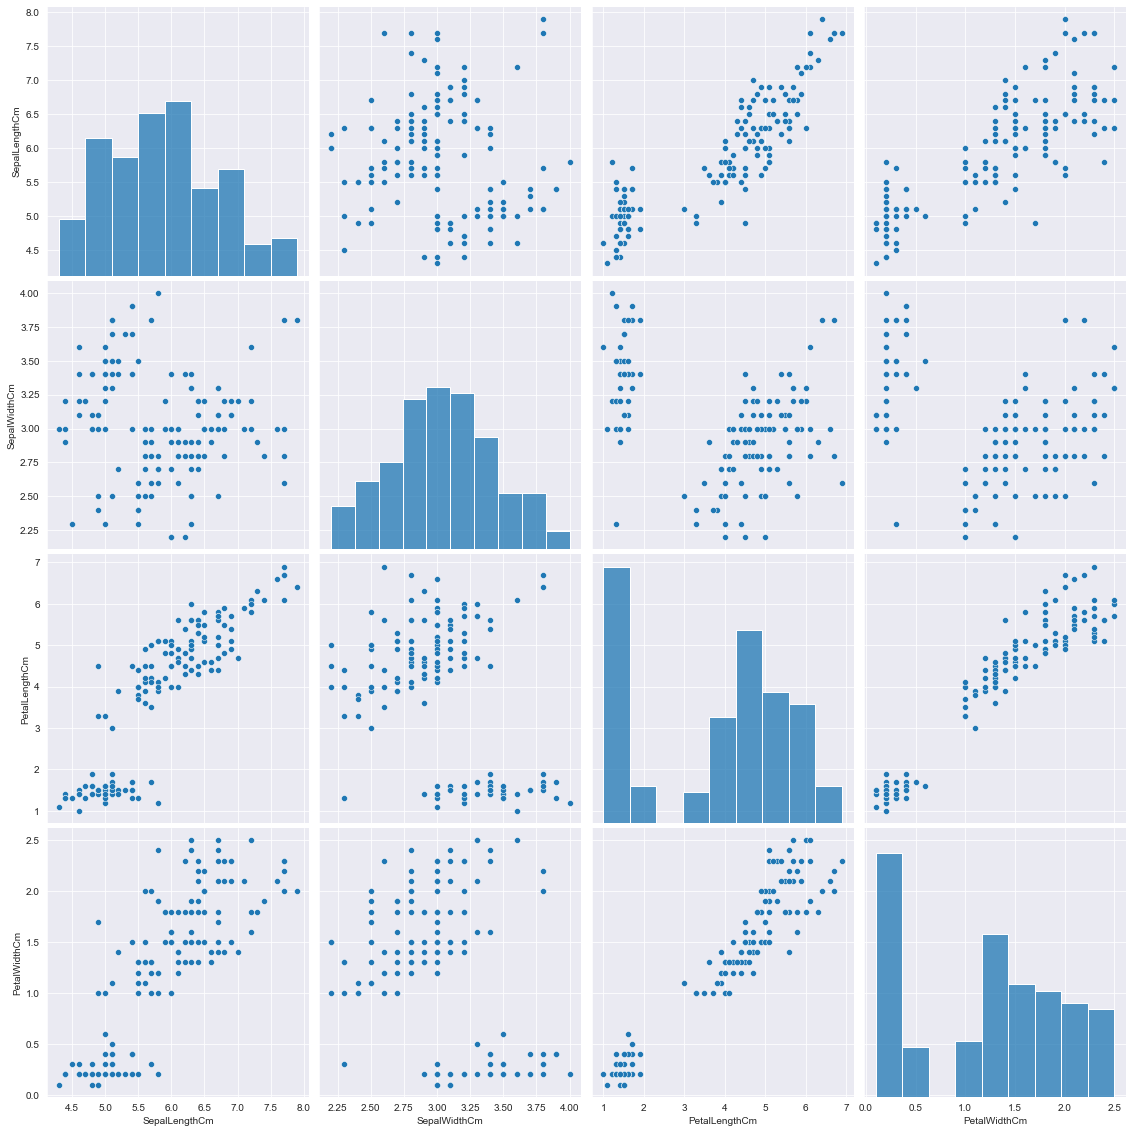

In [10]:
# Plotting a 2D graph showing the distribution
sns.set_style('darkgrid')
sns.pairplot(df,height=4)
plt.show()

## Optimum Number of Centroids

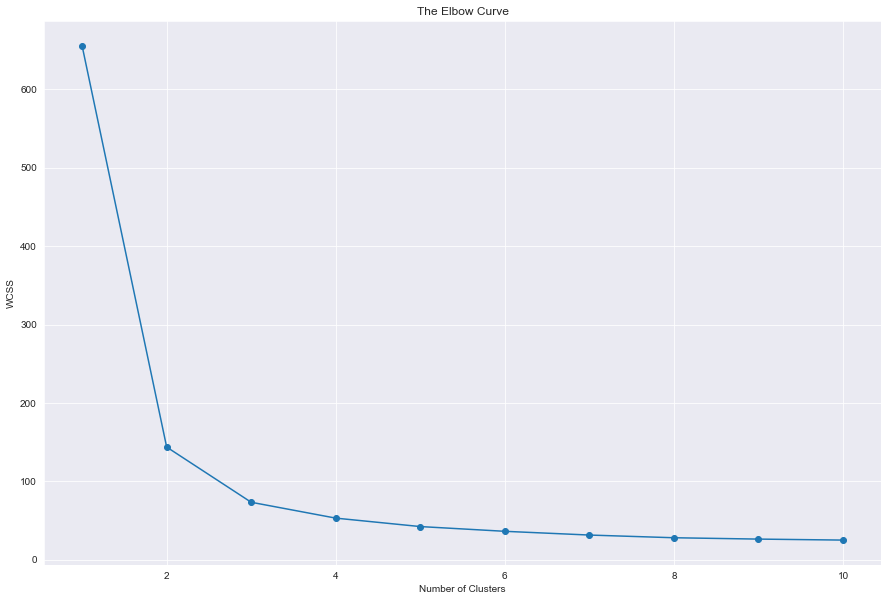

In [11]:
X = df.iloc[:,:-1].values

wcss=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=19)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss, marker='o')
plt.title("The Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS: Within-Cluster Sum of Square
plt.show()

>1. From the above graph we can clearly see that the optimal number of clusters is '3' because as we know the optimum clusters occur at the elbow of the curve.
>2. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

## Visualising the clusters

In [12]:
# Creating the kmeans classifier and applying to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [13]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

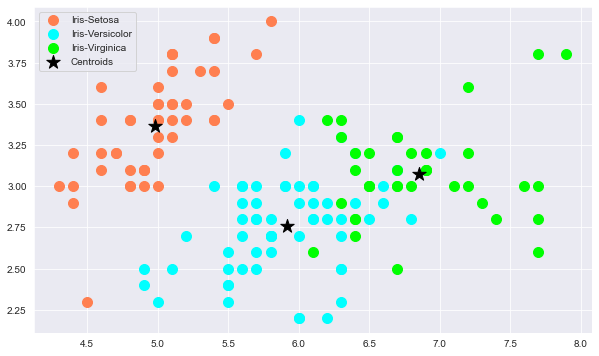

In [14]:
plt.figure(figsize=(10,6))

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='coral', label="Iris-Setosa")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label="Iris-Versicolor")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='lime', label="Iris-Virginica")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, marker='*', c='k', label='Centroids')
plt.legend()
plt.show()